Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel$\rightarrow$Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell$\rightarrow$Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:

In [1]:
NAME = "Michal Marciniak"

---

# Wprowadzenie do programowania probabilistycznego

W tym notebooku zawarte są zadania wprowadzające do rachunku prawdopodobieństwa i statystyki w środowisku python oraz programowania probabilistycznego.


## Rachunek prawdopodobieństwa

Rachunek prawdopodobieństwa, czyli dział matematyki zajmujący się niepewnością i losowością, stanowi podstawę rozpoznawania wzorców. Umożliwia on ujęcie ilościowe niepewności wynikającej np. z szumów występujących w danych lub też ograniczonej ich ilości, dzięki czemu możemy wykonywać predykcje na podstawie danych, które są niekompletne lub niejednoznaczne.

W zadaniu będziemy posługiwać się przykładem. Wyobraźmy sobie dwa pudełka: jedno czerwone i jedno niebieskie. Czerwone pudełko zawiera w sobie 4 jabłka i 6 pomarańczy, natomiast niebieskie zawiera 7 jabłek i 3 pomarańcze. Załóżmy, że:

* losowo wybieramy jedno z pudełek i z tego pudełka losowo wybieramy owoc, a po zaobserwowaniu co to za owoc, zwracamy go do pudełka
* czerwone pudełko wybieramy 30% razy, a niebieskie 70% razy
* szansa na wybór każdego z owoców jest taka sama

W tym przykładzie, wybór pudełka jest **zmienną losową**; oznaczmy ją jako $B$. Zmienna ta może przyjmować dwie wartości: $B=r$ (czerwone pudełko) albo $B=b$ (niebieskie pudełko). Analogicznie, wybór owocu jest również zmienną losową; oznaczmy ją jako $F$ - wówczas $F=a$ oznacza wybór jabłka, a $F=o$ oznacza wybór pomarańczy.

Prawdopodobieństwo wyboru czerwonego pudełka wynosi $\Pr(B=r) = 0.3$, natomiast prawdopodobieństwo wyboru niebieskiego pudełka to $\Pr(B=b) = 0.7$. Są to zdarzenia rozłączne oraz obejmują wszystkie możliwe wyniki, zatem suma prawdopodobieństw ich wystąpienia wynosi $\Pr(B=r) + \Pr(B=b) = 1$.


### Zadanie 1.1a (0,25 p.)

Załóżmy, że powtarzamy powyższy schemat czterokrotnie w celu wylosowania czterech owoców (kolejność nie jest istotna). Podaj przestrzeń zdarzeń elementarnych dla doświadczenia losowego. Zapisz ją w formie listy krotek odpowiednich znaków (np. `[("a", "b"), ("c", "d")]` i przypisz do zmiennej `space_1`.


In [2]:
space_1 = [("a","o","o","o"),
           ("a","a","o","o"),
           ("a","a","a","o"),
           ("a","a","a","a"),
           ("o","o","o","o")]

In [3]:
assert type(space_1) == list
for sample in space_1:
    assert type(sample) == tuple
    assert len(sample) == 4
    for item in sample:
        assert type(item) == str
        assert len(item) == 1
        assert item in {"a", "o", "b", "r"}

        

### Zadanie 1.1b (0,25 p.)

Drugie z doświadczeń polega na wylosowaniu pary ${B, F}$: najpierw losujemy pudełko, a następnie losujemy z niego owoc. Podaj przestrzeń zdarzeń dla tak zdefiniowanego doświadczenia losowego. Zapisz je w postaci listy krotek (np. `[("a", "b"), ("c", "d")]` i przypisz do zmiennej `space_2`.


In [4]:
space_2 = [("r","a"),("r","o"),("b","a"),("b","o")]


In [5]:
assert type(space_2) == list
for sample in space_2:
    assert type(sample) == tuple
    assert len(sample) == 2
    assert sample[0] in {"r", "b"}
    assert sample[1] in {"a", "o"}
    assert all(type(item) == str for item in sample)



Uogólniając powyższy przykład, rozważmy dwie zmienne losowe $X$ i $Y$. Zmienna $X$ może przyjąć dowolną wartość $x \in \{x_1, x_2, \ldots, x_M\}$, a zmienna $Y$ może przyjąć wartości $y \in \{y_i, y_2, \ldots, y_L\}$. Rozważmy, że $N$ razy próbkujemy wartości obu zmiennych $X$ i $Y$; liczba prób, w których $X=x_i$ i $Y=y_j$ wynosi $n_{ij}$. Ponadto, załózmy, że liczba przypadków, gdzie $X$ przyjmuje wartość $x_i$ (bez względu na wartość $Y$) to $c_i$; analogicznie liczba prób, gdy $Y=y_j$ oznaczamy przez $r_j$.

**Prawdopodobieństwo łączne**, tzn. prawdopodobieństwo, że zmienna $X$ przyjmie wartość $x_i$ oraz że $Y$ przyjmie wartość $y_j$ definiuje się jako:

$$\Pr(X=x_i, Y=y_j) = \frac{n_{ij}}{N}\tag{1}$$

Implicite rozważamy tu granicę przy $N\rightarrow\infty$. Analogicznie, **prawdopodobieństwo brzegowe**, tzn. prawdopodobieństwo, że $X$ przyjmuje wartość $x_i$ bez względu na wartość $Y$ można zapisać jako:

$$\Pr(X=x_i) = \frac{c_i}{N}\tag{2}$$


### Zadanie 1.2 (0,25 p.)

W doświadczeniu losowym z pudełkami i owocami, rozpisz liczby wystąpień każdego z przypadków w tablicy dwudzielczej, które dadzą określone wcześniej prawdopodobieństwa, przekształcając powyższe wzory i przypisując odpowiednie wartości do zmiennych zadeklarowanych w tablicy. Tablica dwudzielcza to tabela przedstawiająca łączny rozkład dwóch zmiennych: każda komórka zawiera liczbę wystąpień kombinacji wartości zmiennych. Załóż, że wykonano $N=100$ prób.

| $$B / F $$ |        $$B=r$$ |        $$B=b$$ |                      |
| ---------- | -------------- | -------------- |                      |
|    $$F=a$$ |         `n_ra` |         `n_ba` |       $$\sum_B=r_a$$ | 
|    $$F=o$$ |         `n_ro` |         `n_bo` |       $$\sum_B=r_o$$ |
|            | $$\sum_F=c_r$$ | $$\sum_F=c_b$$ | $$\sum_B\sum_F = N$$ |


In [6]:
p_r = 0.3
p_b = 0.7

N = 100

p_a_r = 0.4 * p_r  # Jablko z czerwonego 
p_o_r = 0.6 * p_r # Pomarancz z czerwonego
p_a_b = 0.7 * p_b # Jablko z niebieskiego
p_o_b = 0.3 * p_b # Pomarancz z niebieskiego

n_ra = p_a_r  * N
n_ro = p_o_r  * N
n_ba = p_a_b  * N
n_bo = p_o_b  * N


In [7]:
assert n_ra + n_ro + n_ba + n_bo == 100


Marginalizacja polega na przejściu z rozkładu łącznego na rozkład brzegowy. Patrząc na tablicę dwudzielną, polega ona na zsumowaniu liczby wystąpień w wierszach albo kolumnach i podzieleniu przez całkowitą liczbę próbek (**reguła brzegowa**).

$$\Pr(X=x_i) = \sum_{j=1}^L \Pr(X=x_i, Y=y_j)\tag{3}$$

Jeżeli rozważymy przykłady, dla których $X=x_i$, wówczas część spośród nich, dla których $Y=y_j$ określa się mianem **prawdopodbieństwa warunkowego**:

$$\Pr(Y=y_j \mid X=x_i) = \frac{n_{ij}}{c_i}\tag{4}$$

Stąd też wynika zależność - **reguła łańcuchowa**:

$$\Pr(X=x_i, Y=y_j) = \frac{n_{ij}}{N} = \frac{n_{ij}}{c_i} \frac{c_i}{N} = \Pr(Y=y_j \mid X=x_i)\Pr(X=x_i)\tag{5}$$


### Zadanie 1.3 (0,25 p.)

Oblicz wartości prawdopodobieństwa warunkowego dla wcześniejszego doświadczenia losowego:

|      prawdopodobieństwo      |  zmienna  |
| ---------------------------- | --------- |
|        $$\Pr(F=a \mid B=r)$$ | `p_fa_br` |
|        $$\Pr(F=o \mid B=r)$$ | `p_fo_br` |
|        $$\Pr(F=a \mid B=b)$$ | `p_fa_bb` |
|        $$\Pr(F=o \mid B=b)$$ | `p_fo_bb` |
|        $$\Pr(B=r \mid F=a)$$ | `p_br_fa` |
|        $$\Pr(B=b \mid F=a)$$ | `p_bb_fa` |
|        $$\Pr(B=r \mid F=o)$$ | `p_br_fo` |
|        $$\Pr(B=b \mid F=o)$$ | `p_bb_fo` |


In [8]:
p_fa_br = p_a_r / p_r
p_fo_br = p_o_r / p_r
p_fa_bb = p_a_b / p_b
p_fo_bb = p_o_b / p_b

P_A = P_O = 0.5

p_br_fa = p_a_r / P_A
p_bb_fa = p_a_b / P_A
p_br_fo = p_o_r / P_O
p_bb_fo = p_o_b / P_O


In [9]:
# testy ukryte


Przekształcając równanie reguły łańcuchowej $(5)$ oraz reguły brzegowej $(3)$ oraz wykorzystując właściwość, że $\Pr(X, Y) = \Pr(Y, X)$, uzyskujemy zależność pomiędzy prawdopodobieństwami warunkowymi:

$$\Pr(Y \mid X) = \frac{\Pr(X \mid Y) \Pr(Y)}{\Pr(X)}\tag{6}$$

Zależność ta nazywana jest **regułą Bayesa** i pełni ona centralną rolę w probabilistycznym uczeniu maszynowym. Wykorzystując ponownie regułę brzegową $(3)$, mianownik równania $(6)$ można przedstawić w postaci:

$$\Pr(X) = \sum_Y \Pr(X \mid Y) \Pr(Y)\tag{7}$$

Można go zatem potraktować jako "stałą normalizującą", gwarantującą, że prawdopodobieństwo warunkowe $\Pr(Y \mid X)$ jest równe $1$.


### Zadanie 1.4 (0,5 p.)

Test diagnostyczny dotyczący pewnej choroby ma następujące parametry:

* jeżeli pacjent jest chory ($Y=1$), to prawdopodobieństwo, że test diagnostyczny dał wynik pozytywny ($X=1$) wynosi $0.9$ (*czułość testu* - stosunek wyników prawdziwie dodatnich do sumy prawdziwie dodatnich i fałszywie ujemnych)
* prawdopodobieństwo że osoba jest chora na tę chorobę ($Y=1$) wynosi $0.014$
* jeżeli pacjent nie jest chory ($Y=0$), to prawdopodobieństwo, że test dał wynik negatywny ($X=0$) wynosi $0.97$ (*swoistość testu* - stosunek wyników prawdziwie ujemnych od sumy prawdziwie ujemnych i fałszywie dodatnich)

1. Zapisz te prawdopodobieństwa używając notacji matematycznej
1. Wyprowadź równania potrzebne do obliczenia prawdopodobieństwa, że pacjent jest chory, jeżeli test wyszedł pozytywny; oblicz to prawdopodobieństwo

Zapisz wynik w zmiennej `p_y1_x1`.


$$ P(X=1 | Y=1) = 0.9 $$
$$ P(Y=1) = 0.014 $$
$$ P(X=0 | Y=0) = 0.97 $$

$$ P(Y=1 | X=1) = \dfrac{P(X=1|Y=1)P(Y=1)}{P(X=1)} = \dfrac{P(X=1|Y=1)P(Y=1)}{\sum_Y \Pr(X = 1 \mid Y) \Pr(Y)} =
\dfrac{P(X=1|Y=1)P(Y=1)}{P(X = 1 | Y = 1) \times P(Y = 1) + P(X = 1 | Y =0) \times P(Y=0)} $$

a:
$$ P(Y=0) = 1 - P(Y=1) = 1 - 0.014 = 0.986 $$
$$ P(X=1 | Y=0) = 1 - P(X=0|Y=0) = 1 - 0.97 = 0.03 $$

więc:

$$ P(Y=1 | X=1) = \dfrac{0.9 \times 0.014}{0.9\times0.014 + 0.03\times0.986} = 0.298719772$$

In [10]:
p_x1_y1 = 0.9
p_y1 = 0.014
p_x0_y0 = 0.97

p_y0 = 1 - p_y1
p_x1_y0 = 1 - p_x0_y0
p_y1_x1 = (p_x1_y1 * p_y1) / (p_x1_y1 * p_y1 + p_x1_y0 * p_y0)
print(p_y1_x1)

0.2987197724039828


In [11]:
# testy ukryte


### Rozkłady prawdopodobieństwa

Oprócz opisywanych wcześniej zmiennych losowych dyskretnych, prawdopodobieństwa mogą dotyczyć również zmiennych ciągłych. Rozkład prawdopodobieństa zmiennych ciągłych opisany jest **funkcją gęstości** $p(x)$. Prawdopodobieństwo, że zmienna losowa $X$ przyjmuje wartości z przedziału $[a, b]$ można wyznaczyć przy pomocy równania:

$$\Pr(a \le X \le b) = \int_a^b p(x) dx\tag{8}$$

Funkcja gęstości spełnia dwa kryteria:
* $p(x) \ge 0$ - prawdopodobieństwo jest nieujemne,
* $\int_{-\infty}^{\infty} p(x) dx = 1$ - całkowite prawdopodobieństwo jest równe $1$.


**Dystrybuantą**, czyli funkcją skumulowanej gęstości prawdopodobieństwa nazywamy prawdopodobieństwo, że $x$ leży w przedziale $(-\infty, z)$:

$$F(z) = \int_{-\infty}^z p(x) dx\tag{9}$$

Dla zmiennych dyskretnych funkcja $p(x)$ jest nazywana **funkcją masy prawdopodobieństwa**.

Załóżmy, że $x$ i $y$ są dwoma zmiennymi ciągłymi. Funkcja gęstości spełnia reguły:

* brzegową: $p(x) = \int p(x, y) dy$
* łańcuchową: $p(x, y) = p(x \mid y)p(y)$
* Bayesa: $p(y \mid x) = \frac{p(x \mid y) p(y)}{p(x)}$

#### Własności rozkładu prawdopodobieństwa

Podstawową własnością rozkładu jest **wartość oczekiwana**, określająca spodziewany wynik doświadczenia losowego. Dla rozkładu dyskretnego dany jest wzorem:

$$\mathbb{E}[X] = \sum_{x\in\mathcal{X}} x \cdot p(x)\tag{10}$$

natomiast dla rozkładu ciągłego definiuje się:

$$\mathbb{E}[X] = \int_{x\in\mathcal{X}} x \cdot p(x) dx\tag{11}$$

**Wariancja** to własność określająca jak bardzo wartości $x$ odchylają się od średniej (*rozpiętość rozkładu*)

$$Var[X] = \mathbb{E}[(X - \mathbb{E}[X])^2] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2\tag{12}$$

**Odchylenie standardowe** definiowane jest jako pierwiastek z wariancji:

$$std[X] = \sqrt{Var[X]}\tag{13}$$

Dla dwóch zmiennych losowych $X$ i $Y$, **kowariancja** określa stopień, w jakim zależą od siebie liniowo. Dana jest ona wzorem:

$$cov[X, Y] = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])] = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y] \in [0, \infty)\tag{14}$$

**Korelacja** jest znormalizowana postacią kowariancji:

$$corr[X, Y] = \frac{cov[X, Y]}{\sqrt{Var[X]Var[Y]}} \in [-1, 1]\tag{15}$$

Dla liniowo zależnych zmiennych losowych $X$ i $Y$ $|corr[X, Y]| = 1$. Gdy zmienne są od siebie niezależne, tzn. $\Pr(X,Y) = \Pr(X)\Pr(Y)$, wtedy $corr[X, Y] = 0$.


## Pyro

[**Pyro**](https://pyro.ai) to probabilistyczny język programowania udostępniony przez Uber AI Labs. Zbudowany jest on na frameworku PyTorch, łącząc modelowanie modeli głębokich z modelowaniem bayesowskim.

Probabilistyczny język programowania to język zaprojektowany do budowy oraz wnioskowania w modelach probabilistycznych. Zagadnienie to będzie omawiane w ramach kolejnych laboratoriów - tutaj skupimy się na podstawowych prymitywach Pyro.

Podobnie jak PyTorch, Pyro pozwala na wykorzystanie dowolnych instrukcji Pythona, takich jak pętle, rekursja, funkcje wysokopoziomowe itp., dzięki czemu można w nim zareprezentować dowolny obliczalny rozkład prawdopodobieństwa.

Podstawowym elementem programów probabilistycznych są *funkcje stochastyczne*. W Pyro są to pythonowe *callable* (obiekty implementujące metodę `__call__()`) lub moduły PyTorcha `nn.Module`, zawierające deterministyczny kod oraz podstawowe funkcje stochastyczne, wywołujące generator liczb losowych. W ramach tego laboratorium rozważać będziemy te pierwsze.

### Podstawowe funkcje stochastyczne w Pyro

Pyro wykorzystuje funkcje stochastyczne (rozkłady prawdopodobieństwa) będące wrapperem `torch.distribution`. Znajdują się one w module `pyro.distributions` ([dokumentacja](http://docs.pyro.ai/en/stable/distributions.html#distributions)). Aby próbkować wartości z tych rozkładów można używać metod z biblioteki `torch`: `.rsample()` oraz `.sample()`, jednak w przypadku Pyro lepiej wykorzystać funkcję `pyro.sample`, będącą jedną z kluczowych elementów biblioteki. Jej użycie przedstawiono w kolejnej komórce.

```python
import pyro.distributions as dist


distribution = dist.Normal(0, 1)

# te dwa wywołania są równoważne
torch_sampled = distribution.sample()
# pyro.sample pozwala na tworzenie programu Pyro
pyro_sampled = pyro.sample("my_sample", distribution)
```


In [12]:
# przykład użycia pyro.distributions dla rozkładu kategorycznego i normalnego
from IPython.display import display, Math
import pyro
import pyro.distributions as dist
import torch


# rozkład kategoryczny
probas = [0.2, 0.15, 0.33, 0.26, 0.06]  # prawdopodobieństwa kategorii
categorical = dist.Categorical(         # rozkład kategoryczny
    torch.tensor(probas)
)
display(Math(f"x \sim Cat({probas})"))

x = pyro.sample(                       # próbkowanie z rozkładu
    "category",                        # nazwa zmiennej przechowywanej przez pyro
    categorical                        # podstawowa funkcja stochastyczna
)
x_log_prob = categorical.log_prob(x)   # prawdopodobieństwo zaobserwowania 
                                       # tej wartości przy próbkowaniu
                                       # z rozkładu kategorycznego
display(
    Math(f"\Pr(x = {x}) = {torch.exp(x_log_prob).item():.3f})")
)


# rozkład normalny
loc = 0.                               # wartość oczekiwana 0.
scale = 1.                             # odchylenie standardowe 1.
normal = dist.Normal(loc, scale)       # rozkład normalny
display(Math(f"y \sim \mathcal{{N}}(\mu={loc}, \sigma={scale})"))

y = pyro.sample("normal", normal)      # próbkowanie z rozkładu
y_log_prob = normal.log_prob(y)        # prawdopodobieństwo zaobserwowania 
                                       # tej wartości przy próbkowaniu
                                       # z rozkładu normalnego
display(
    Math(f"\Pr(y = {y:.3f}) = {torch.exp(y_log_prob).item():.3f})")
)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Zadanie 1.5 (0,5 p.)

Wybierz jeden ciągły rozkład prawdopodobieństwa spośród dostępnych w `pyro.distributions` i omówionych na wykładzie. Przygotuj animację, która pokaże jak z kolejnymi próbkowaniami rozkładu zmieniać się będzie rozkład wartości. Stwórz histogram wystąpień.

Podpowiedź: próbkowane wartości zbieraj w liście i generuj wykres dla każdego kroku. Skorzystaj z przygotowanej funkcji animowania.


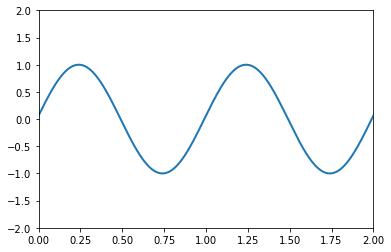

In [13]:
## przykład tworzenia animacji z użyciem matplotlib.animation
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation, rc


def animate():
    # przygotuj wykres do rysowania animacji
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # funkcja animacji, wywoływana sekwencyjnie
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # funkcja inicjalizacji, rysująca tło każdej klatki
    def init():
        line.set_data([], [])
        return (line,)
    
    # wywołanie animacji; blit=True  powoduje rysowanie tylko zmian
    anim = animation.FuncAnimation(
        fig, sin, init_func=init, frames=100, interval=20, blit=True
    )
    
    return anim.to_jshtml()

HTML(animate())


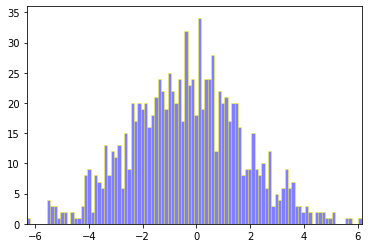

In [14]:
#https://www.joshmeetscomputer.com/matplotlib-histogram-animation/ <- histogram with matplotlib animation
import matplotlib.patches as patches
import matplotlib.path as path

def animate_distribution():
    fig, ax = plt.subplots()
#     ax.set_xlim(( 0, 2))
#     ax.set_ylim((-2, 2))
    
#     line, = ax.plot([], [], lw=2)
    loc = 0.
    scale = 2.
    normal = dist.Normal(loc, scale) 
    
    bins_num = 100
    patch = None
    
    x = np.linspace(0, 2, 1000)
    y = []
    for _ in range(len(x)):
        y.append(pyro.sample("normal", normal))
    n,bins = np.histogram(y, bins_num)

          
    left = np.array(bins[:-1])
    right = np.array(bins[1:])
    bottom = np.zeros(bins_num)
    top = bottom + n

    num_verts = bins_num * (1 + 3 + 1)
    verts = np.zeros((num_verts, 2))

    verts[0::5, 0] = left
    verts[0::5, 1] = bottom
    verts[1::5, 0] = left
    verts[1::5, 1] = top

    verts[2::5, 0] = right
    verts[2::5, 1] = top
    verts[3::5, 0] = right
    verts[3::5, 1] = bottom

    codes = np.ones(num_verts,int) * path.Path.LINETO
    codes[0::5] = path.Path.MOVETO
    codes[4::5] = path.Path.CLOSEPOLY
    
    
    def distribution(i):
        x = np.linspace(0, 2, 1000)
        y = []
        for _ in range(len(x)):
            y.append(pyro.sample("normal", normal))
        n,bins = np.histogram(y, bins_num)
        bottom = np.zeros(bins_num)
        top = bottom + n
        
        verts[1::5, 1] = top
        verts[2::5, 1] = top
        return [patch,]

   
    bar_path = path.Path(verts, codes);

    patch = patches.PathPatch(bar_path, facecolor='blue', edgecolor='yellow', alpha=0.5);
    
    ax.add_patch(patch)
    ax.set_xlim(bins[0], bins[-1])
    ax.set_ylim(np.min(bottom), top.max() + 5)
    
    
    anim = animation.FuncAnimation(
        fig, distribution, frames=100, interval=20, blit=True 
    )
    
    return anim.to_jshtml()

HTML(animate_distribution())


Tak jak wspomniano wcześniej, w Pyro funkcje stochastyczne mogą zawierać zarówno odwołania do podstawowych funkcji stochastycznych `pyro.distributions`, jak i deterministyczny kod pythonowy, co pozwala na modelowanie różnych doświadczeń losowych. Przykładowo, w poniższej komórce znajduje się model doświadczenia losowego, przedstawionego na początku notatnika.


In [15]:
# doświadczenie losowe: wylosuj pudełko, a następnie z niego wylosuj owoc
def get_fruit(box_proba=0.45, red_box_proba=0.4, blue_box_proba=0.7):
    boxes = ["r", "b"]
    fruit = ["a", "o"]
    box_idx = pyro.sample("box", dist.Bernoulli(box_proba))
    if box_idx == 0:
        fruit_idx = pyro.sample("fruit", dist.Bernoulli(red_box_proba))
    else:
        fruit_idx = pyro.sample("fruit", dist.Bernoulli(blue_box_proba))
    return boxes[int(box_idx)], fruit[int(fruit_idx)]


for _ in range(5):
    box, fruit = get_fruit()
    print(f"Wylosowano '{fruit}' z pudełka '{box}'")


Wylosowano 'o' z pudełka 'b'
Wylosowano 'a' z pudełka 'r'
Wylosowano 'o' z pudełka 'b'
Wylosowano 'o' z pudełka 'r'
Wylosowano 'o' z pudełka 'r'


Dzięki temu możliwe jest stworzenie symulatora, który powtórzy doświadczenie dostatecznie dużą liczbę razy w celu numerycznego przybliżenia prawdopodobieństw, które wcześniej wyznaczyliśmy obliczając je ręcznie.


In [16]:
# powtórz doświadczenie dużą liczbę razy i aproksymuj prawdopodobieństwa
total = 10_000
n_boxes = {"r": 0, "b": 0}
n_fruit = {"a": 0, "o": 0}
for _ in range(total):
    box, fruit = get_fruit()
    n_boxes[box] += 1
    n_fruit[fruit] += 1


display(Math(f"$$\Pr(B=r)\simeq{n_boxes['r'] / total:.3f}$$"))
display(Math(f"$$\Pr(B=b)\simeq{n_boxes['b'] / total:.3f}$$"))
display(Math(f"$$\Pr(F=a)\simeq{n_fruit['a'] / total:.3f}$$"))
display(Math(f"$$\Pr(F=o)\simeq{n_fruit['o'] / total:.3f}$$"))
print("itd.")
    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

itd.


### Zadanie 1.6 (1,5 p.)

Rozważmy doświadczenie losowe: student aplikował na 9 kierunków. Szanse przyjęcia dla każdego z kierunków są równe i wynoszą 1%. Niestety, student nie został przyjęty na żaden z kierunków. Jakie jest prawdopodobieństwo takiej sytuacji? Wybierz odpowiedni rozkład prawdopodobieństwa i oblicz prawdopodobieństwo ręcznie, wpisując tok rozumowania do następnej komórki oraz przypisując wynik do zmiennej `p_reject`. Zamodeluj doświadczenie w formie symulatora uzupełniając funkcję `attempt_join_university`, która wykona doświadczenie losowe, oraz funkcję `simulate_join_university`, która wykona to doświadczenie zadaną liczbę razy i zwróci prawdopodobieństwo opisywanego zdarzenia.


$$ \textit{prawdopodobieństwo sukcesu}: p = 0.01 $$
$$ \textit{prawdopodobieństwo porażki}: 1- p = 0.99 $$
Korzystając z schematu Bernoulliego:

$$ P(X = k) = {n \choose k} \times p^k \times (1-p)^{n-k} $$

Otrzymujemy:

$$ P(X = 0) = {9 \choose 0} \times 0.01^{0} \times 0.99^{9-0} = 0.913517247 $$

In [17]:
p_reject = np.power(0.99,9)

print(p_reject)

0.9135172474836408


In [18]:
display(Math(f"$$\Pr(reject)={p_reject:.5f}$$"))

# testy ukryte


<IPython.core.display.Math object>

In [19]:
def attempt_join_university(n_trials=9, p_admission=0.01):
    """Funkcja stochastyczna modelująca doświadczenie losowe."""
    for i in range(n_trials):
        result = pyro.sample("trial", dist.Bernoulli(p_admission))
        if result == 1:
            return 0
    return 1

    
def simulate_join_university(n_simulations=10_000):
    """Wykonaj doświadczenie losowe określoną liczbę.
    Zwraca przybliżone prawdopodobieństwo nie przyjęcia na żaden z kierunków
    przy zadanej liczbie prób.
    """
    n_rejections = 0
    for i in range(n_simulations):
        n_rejections += attempt_join_university()
        
    return n_rejections / n_simulations


In [20]:
display(Math(f"$$\Pr(reject)\simeq{simulate_join_university():.5f}$$"))

# testy ukryte


<IPython.core.display.Math object>

### Zadanie 1.7 (1,5 p.)

Przygotuj symulator dla zadania 1.4. Sprawdź, jak czułość i swoistość testu oraz prawdopodobieństwo choroby wpływają na osiągany wynik. Wykonaj wizualizację zależności prawdopodobieństwa bycia chorym przy pozytywnym wyniku testu od ww. parametrów.


In [21]:
# p_x1_y1 - czulosc
# p_x0_y0 - swoistosc
def diagnose(disease_prob = 0.014,p_x1_y1 = 0.9,p_x0_y0 = 0.97):
    if disease_prob > 1 or p_x1_y1 > 1 or p_x0_y0 > 1:
        raise ValueError("probability cannot be higher than 1")
    if disease_prob < 0 or p_x1_y1 < 0 or p_x0_y0 < 0:
        raise ValueError("probablity cannot be lower than 0")
    p_x1_y0 = 1 - p_x0_y0
    is_disease = pyro.sample("diseasse", dist.Bernoulli(disease_prob))
    test_prob = p_x1_y1 if is_disease == 1 else p_x1_y0
    test_result = pyro.sample("test",dist.Bernoulli(test_prob))
    
    return [is_disease, test_result]

def simulate_diagnosis(n_simulations=10_000,disease_prob=0.014,
                      p_x1_y1 = 0.9, p_x0_y0 = 0.97):
    results = {"x0y0":0, "x1y0":0,
                "x0y1":0, "x1y1":0}
    
    for _ in range(n_simulations):
        is_disease, test_result = diagnose(disease_prob,p_x1_y1,p_x0_y0)
        if is_disease == 1:
            if test_result == 1:
                results["x1y1"] += 1
            else:
                results["x0y1"] += 1
        else:
            if test_result == 1:
                results["x1y0"] += 1
            else:
                results["x0y0"] += 1
        
    return results



total = 10_000
results = simulate_diagnosis(total)
display(Math(f"$$\Pr(X=1|Y=0)\simeq{results['x1y0'] / total:.3f}$$"))
display(Math(f"$$\Pr(X=1|Y=1)\simeq{results['x1y1'] / total:.3f}$$"))
display(Math(f"$$\Pr(X=0|Y=0)\simeq{results['x0y0'] / total:.3f}$$"))
display(Math(f"$$\Pr(X=0|Y=1)\simeq{results['x0y1'] / total:.3f}$$"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Test wpływu czułości przy stałej wartości P(Y=1) = 0.014 oraz  swoistości = 0.97

In [22]:
from tqdm import tqdm

In [23]:
sensitivity_range = np.linspace(0.1,0.99,num=50)

sensitivity_results = []
total = 10000
for sensitivity in tqdm(sensitivity_range):
    results = simulate_diagnosis(total,p_x1_y1=sensitivity)
    
    p_x1_y1 = results['x1y1'] / total
    p_y1 = (results['x1y1'] + results['x0y1']) / total
    p_x1_y0 = results['x1y0'] / total
    
    p_y1_x1 = (p_x1_y1 * p_y1) / (p_x1_y1 * p_y1 + p_x1_y0 * p_y0)
    sensitivity_results.append(p_y1_x1)


100%|██████████| 50/50 [01:17<00:00,  1.55s/it]


Text(0, 0.5, 'P(Y=1|X=1)')

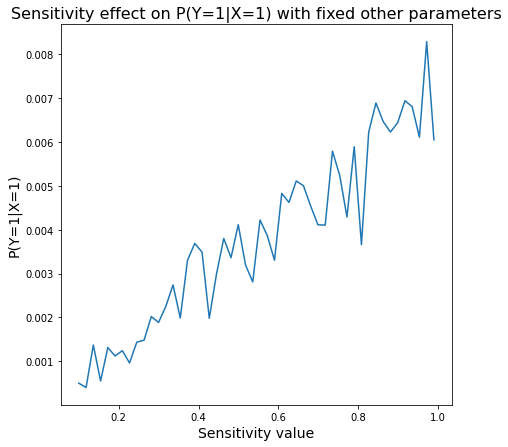

In [24]:
fig = plt.figure(figsize=(7,7))
plt.plot(sensitivity_range, sensitivity_results)
plt.title("Sensitivity effect on P(Y=1|X=1) with fixed other parameters",fontsize=16)
plt.xlabel("Sensitivity value",fontsize=14)
plt.ylabel("P(Y=1|X=1)",fontsize=14)

In [25]:
specificity_range = np.linspace(0.1,0.99,num=50)

specificity_results = []
total = 10000
for specificity in tqdm(specificity_range):
    results = simulate_diagnosis(total,p_x0_y0 =specificity)
    
    p_x1_y1 = results['x1y1'] / total
    p_y1 = (results['x1y1'] + results['x0y1']) / total
    p_x1_y0 = results['x1y0'] / total
    
    p_y1_x1 = (p_x1_y1 * p_y1) / (p_x1_y1 * p_y1 + p_x1_y0 * p_y0)
    specificity_results.append(p_y1_x1)


100%|██████████| 50/50 [01:17<00:00,  1.56s/it]


Text(0, 0.5, 'P(Y=1|X=1)')

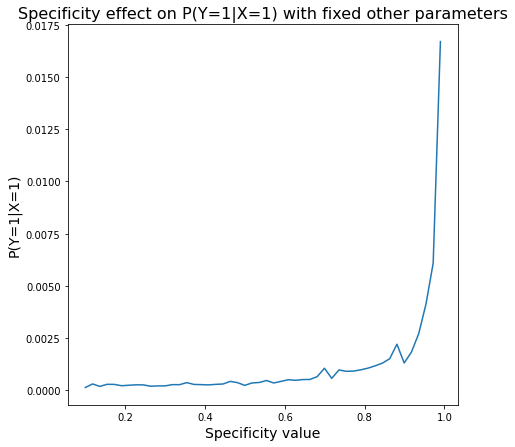

In [26]:
fig = plt.figure(figsize=(7,7))
plt.plot(specificity_range, specificity_results)
plt.title("Specificity effect on P(Y=1|X=1) with fixed other parameters",fontsize=16)
plt.xlabel("Specificity value",fontsize=14)
plt.ylabel("P(Y=1|X=1)",fontsize=14)

In [27]:
disease_prob_ranges = np.linspace(0.1,0.99,num=50)

disease_prob_results = []
total = 10000
for disease_prob in tqdm(disease_prob_ranges):
    results = simulate_diagnosis(total,disease_prob=disease_prob)
    
    p_x1_y1 = results['x1y1'] / total
    p_y1 = (results['x1y1'] + results['x0y1']) / total
    p_x1_y0 = results['x1y0'] / total
    
    p_y1_x1 = (p_x1_y1 * p_y1) / (p_x1_y1 * p_y1 + p_x1_y0 * p_y0)
    disease_prob_results.append(p_y1_x1)

100%|██████████| 50/50 [01:18<00:00,  1.57s/it]


Text(0, 0.5, 'P(Y=1|X=1)')

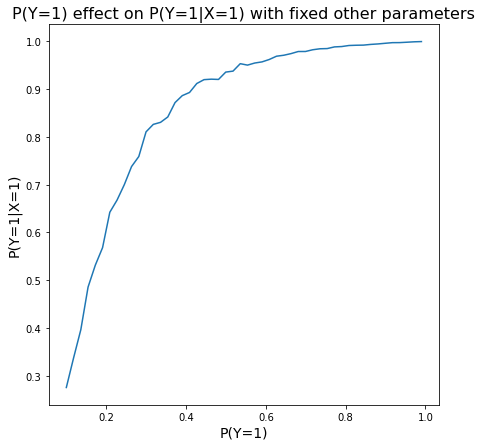

In [28]:
fig = plt.figure(figsize=(7,7))
plt.plot(disease_prob_ranges, disease_prob_results)
plt.title("P(Y=1) effect on P(Y=1|X=1) with fixed other parameters",fontsize=16)
plt.xlabel("P(Y=1)",fontsize=14)
plt.ylabel("P(Y=1|X=1)",fontsize=14)

## Uwaga: Wykonanie poniższego kodu jest dosyć czasochłonne

In [29]:
from mpl_toolkits import mplot3d

In [30]:
num_elements = 25
sensitivity_range = np.linspace(0.1,0.99,num=num_elements)
specificity_range = np.linspace(0.1,0.99,num=num_elements)


test_results = np.zeros((num_elements,num_elements))

X, Y = np.meshgrid(sensitivity_range, specificity_range)

disease_prob = 0.014

total = 8000
with tqdm(total= num_elements * num_elements) as pbar:
    for i, sensitivity in tqdm(enumerate(sensitivity_range)):
        for j, specificity_results in enumerate(specificity_range):
            results = simulate_diagnosis(total,
                                         disease_prob=0.014,
                                         p_x1_y1=sensitivity,
                                         p_x0_y0=specificity)

            p_x1_y1 = results['x1y1'] / total
            p_y1 = (results['x1y1'] + results['x0y1']) / total
            p_x1_y0 = results['x1y0'] / total

            p_y1_x1 = (p_x1_y1 * p_y1) / (p_x1_y1 * p_y1 + p_x1_y0 * p_y0)
            test_results[i,j] = p_y1_x1 
            pbar.update(1)

100%|██████████| 625/625 [13:27<00:00,  1.32s/it]
25it [13:27, 32.31s/it]
100%|██████████| 625/625 [13:27<00:00,  1.29s/it]


In [31]:
%matplotlib notebook

<IPython.core.display.Javascript object>


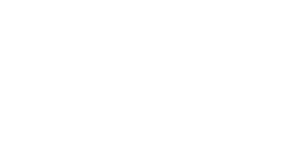

<IPython.core.display.Javascript object>


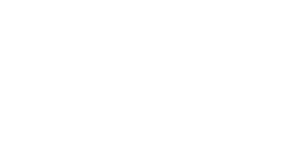

In [32]:
ax = plt.axes(projection='3d')

ax.contour3D(X, Y, test_results,50, cmap='binary')
ax.set_xlabel('Sensitivity value')
ax.set_ylabel('Specificity value')
ax.set_zlabel('P(Y=1|X=1)');
ax.set_title('Specificity and Sensitivity effect on P(Y=1|X=1)');